# Feature Engineering and Selection 

### Importing the packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
heart_data=pd.read_csv("data/heart.csv")

### Data Description

In [2]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.drop("target",axis=1).describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Feature Analysis

In [6]:
heart_data.drop("target",axis=1).corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


#### Data Distribution

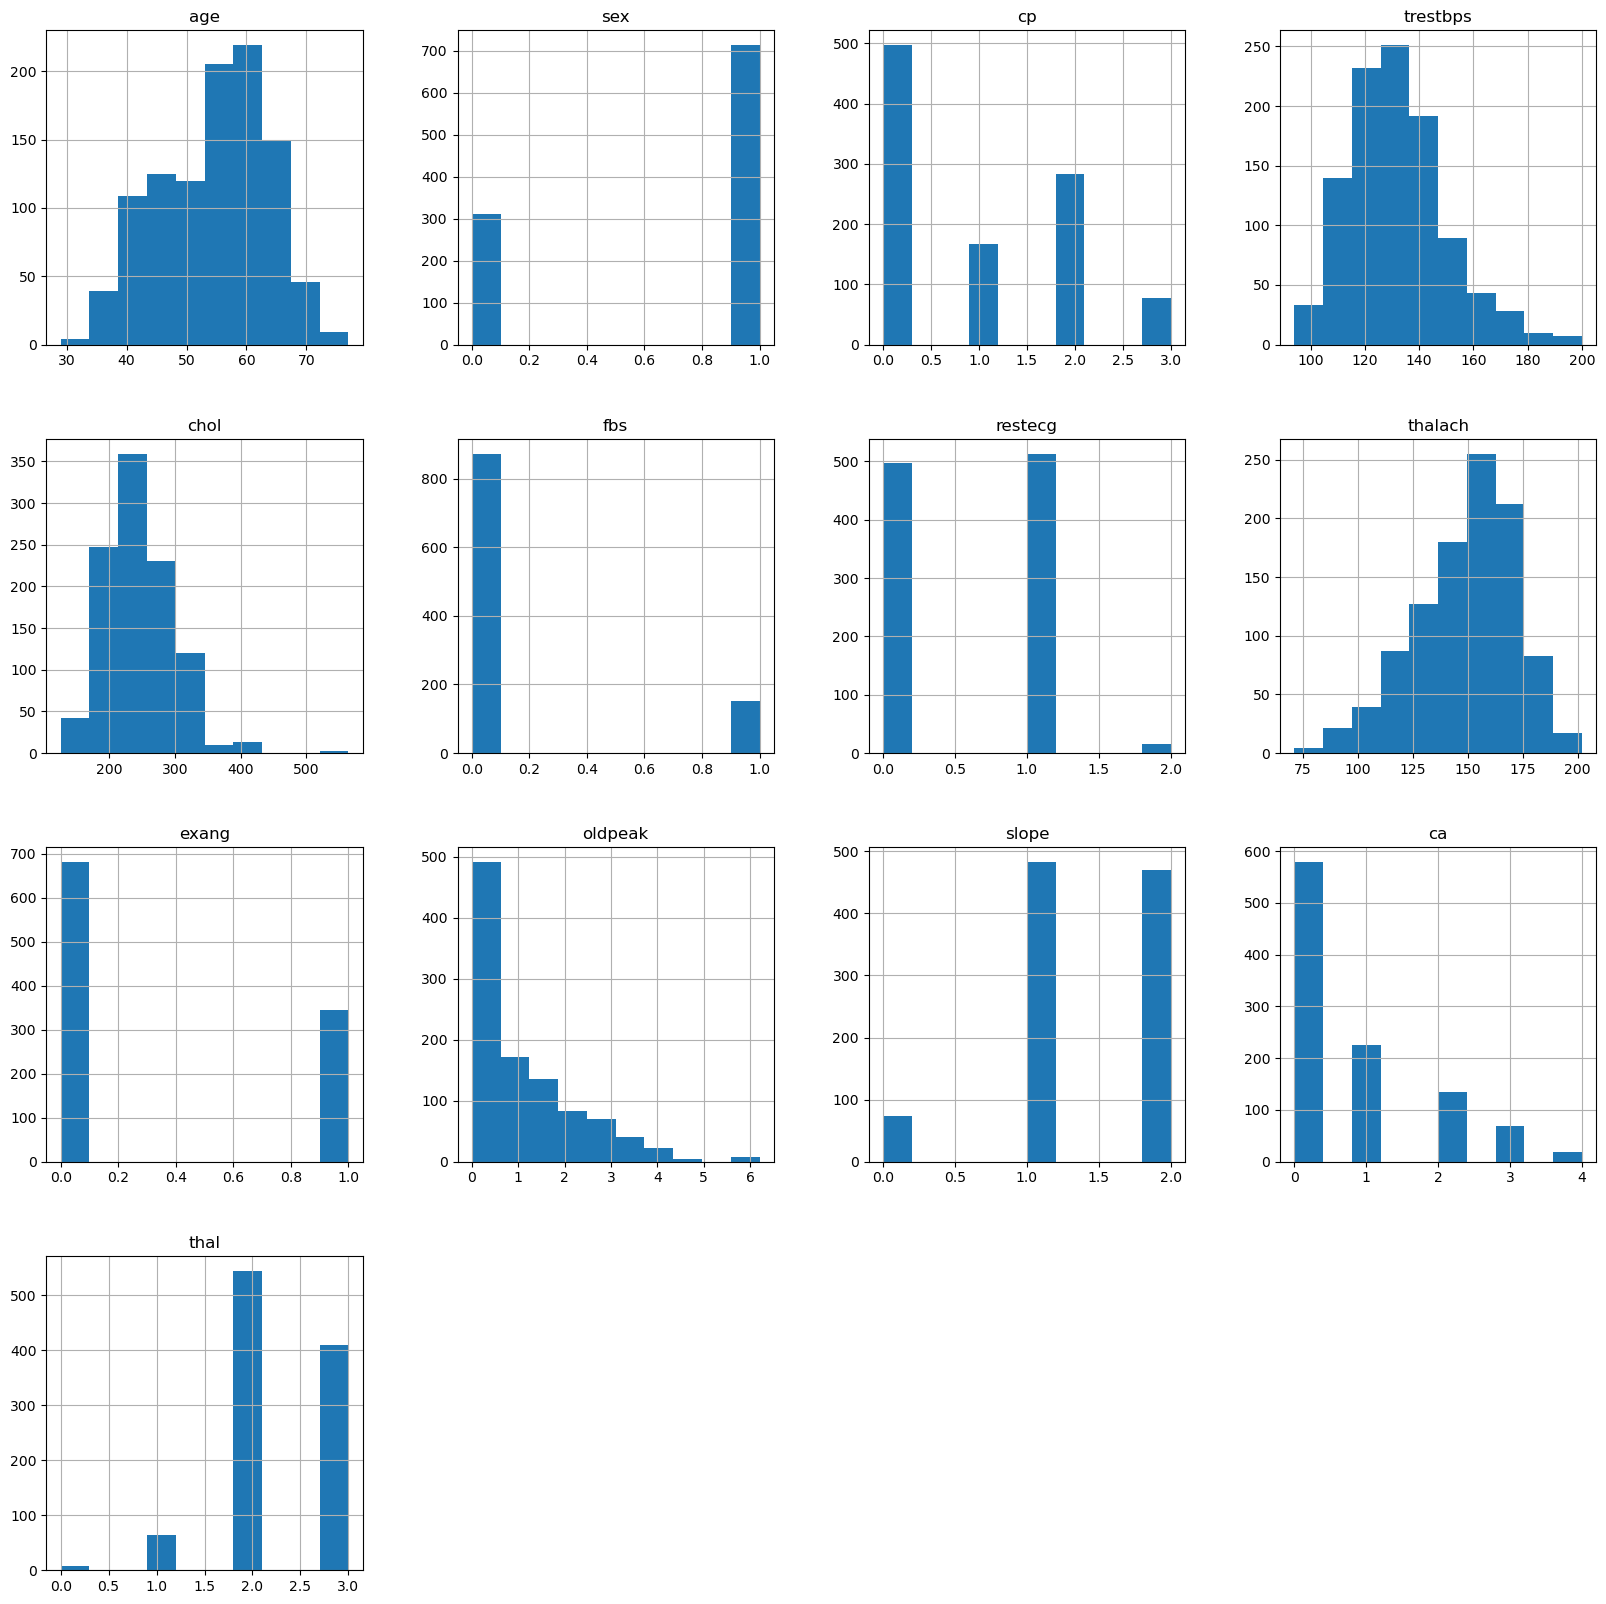

In [7]:
heart_data.drop("target",axis=1).hist(figsize=(20,20))
plt.show()

#### Analysis of heart_disease based on Gender(Sex)

In [8]:
conf=pd.crosstab(heart_data.sex,heart_data.target)
conf["Total"]=conf[0]+conf[1]
conf.index=["Female","Male"]
conf["ratio"]=(conf[1]/conf["Total"])*100
conf

target,0,1,Total,ratio
Female,86,226,312,72.435897
Male,413,300,713,42.075736


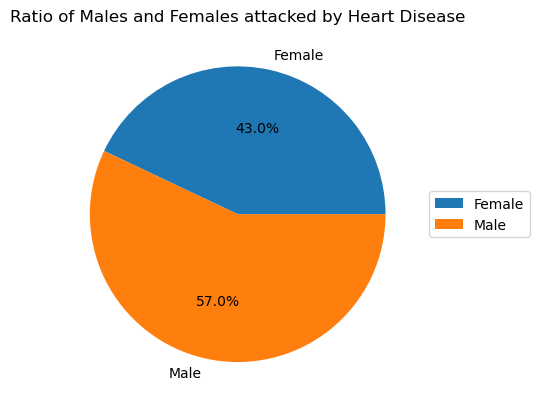

In [9]:
fig,ax=plt.subplots()
wedges, texts, autotexts = ax.pie(conf[1],labels=conf.index,autopct="%1.1f%%")
ax.legend(wedges,conf.index,loc="center left",bbox_to_anchor=(1,0,0.5,1))
ax.set(title="Ratio of Males and Females attacked by Heart Disease")
plt.show()

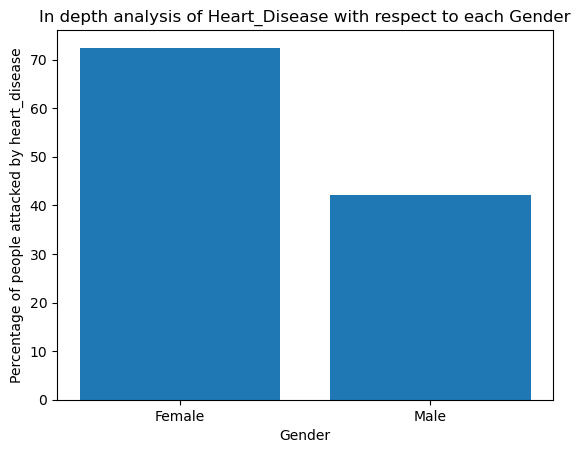

In [10]:
fig,ax=plt.subplots()
ax.bar(conf.index,conf.ratio)
ax.set(xlabel="Gender",
       ylabel="Percentage of people attacked by heart_disease",
       title="In depth analysis of Heart_Disease with respect to each Gender")
plt.show()


#### Analysis of heart_disease based on Chest Pain

In [11]:
heart_data.cp.unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
chest_pain=pd.crosstab(heart_data.cp,heart_data.target)

In [13]:
chest_pain

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


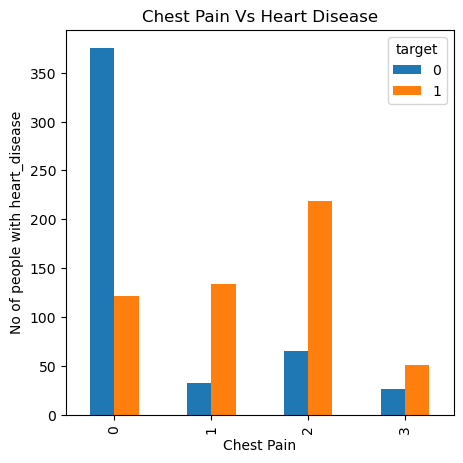

In [14]:
fig,ax=plt.subplots(figsize=(5,5))
chest_pain.plot(kind="bar",ax=ax)
ax.set(xlabel="Chest Pain",
       ylabel="No of people with heart_disease",
       title="Chest Pain Vs Heart Disease")
plt.show()

In [15]:
chest_pain["ratio"]=(chest_pain[1])/(chest_pain[1]+chest_pain[0])*100
chest_pain

target,0,1,ratio
cp,,,
0,375,122,24.547284
1,33,134,80.239521
2,65,219,77.112676
3,26,51,66.233766


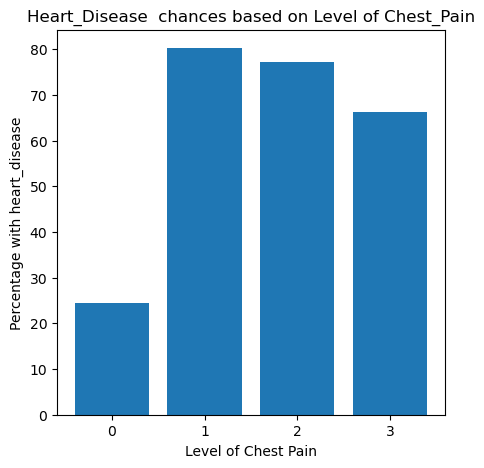

In [16]:
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(chest_pain.index,chest_pain.ratio)
ax.set(xlabel="Level of Chest Pain",
       ylabel="Percentage with heart_disease",
       title="Heart_Disease  chances based on Level of Chest_Pain",
       xticks=chest_pain.index,
       xticklabels=chest_pain.index)
plt.show()

### Featuere Generation

#### Deriving the  new column from existing one

In [17]:
col=["trestbps","chol","target"]
heart_data[col].corr()

,trestbps,chol,target
trestbps,1.000000,0.127977,-0.138772
chol,0.127977,1.000000,-0.099966
target,-0.138772,-0.099966,1.000000


In [18]:
heart_data["chol_trestbps"]=heart_data.chol*heart_data.trestbps

In [19]:
col=["chol_trestbps","target"]
heart_data[col].corr()

,chol_trestbps,target
chol_trestbps,1.000000,-0.152161
target,-0.152161,1.000000


#### Discretization of Age column

In [20]:
heart_data["age_d"]=pd.cut(heart_data.age,bins=list(range(0,100,30)),labels=["Young Age","Middle Age","Old Age"])

In [21]:
pd.crosstab(heart_data.age_d,heart_data.target)

target,0,1
age_d,,
Young Age,0,4
Middle Age,338,411
Old Age,161,111


#### One-Hot Encoding for Categorical Variable

In [22]:
heart_data=pd.get_dummies(heart_data,columns=["cp","thal","age_d"],drop_first=True)

In [23]:
heart_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,target,chol_trestbps,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,age_d_Middle Age,age_d_Old Age
0,52,1,125,212,0,1,168,0,1.0,2,...,0,26500,False,False,False,False,False,True,True,False
1,53,1,140,203,1,0,155,1,3.1,0,...,0,28420,False,False,False,False,False,True,True,False
2,70,1,145,174,0,1,125,1,2.6,0,...,0,25230,False,False,False,False,False,True,False,True
3,61,1,148,203,0,1,161,0,0.0,2,...,0,30044,False,False,False,False,False,True,False,True
4,62,0,138,294,1,1,106,0,1.9,1,...,0,40572,False,False,False,False,True,False,False,True


### Feature Selection 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
heart_data=pd.read_csv("data/heart.csv")

#### Principal Component Analysis  

In [25]:
x=heart_data.drop("target",axis=1)
y=heart_data.target
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)

[0.21369912 0.11971959 0.09238384 0.08994039 0.07685925 0.07479569
 0.06741785 0.05907578 0.05584142 0.04849683 0.04017354 0.0332042 ]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=101)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.9844357976653697


#### Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf=RandomForestClassifier()
clf.fit(x,y)
sfm=SelectFromModel(clf,threshold="mean",prefit=True)
x_imp=sfm.transform(x)
imp_features=pd.DataFrame(x_imp,columns=x.columns[sfm.get_support()])
print(imp_features.head())
print(clf.feature_importances_)

    age   cp   chol  thalach  oldpeak   ca  thal
0  52.0  0.0  212.0    168.0      1.0  2.0   3.0
1  53.0  0.0  203.0    155.0      3.1  0.0   3.0
2  70.0  0.0  174.0    125.0      2.6  0.0   3.0
3  61.0  0.0  203.0    161.0      0.0  1.0   3.0
4  62.0  0.0  294.0    106.0      1.9  3.0   2.0
[0.09027612 0.0344735  0.13950436 0.07198036 0.07805534 0.01141288
 0.01857628 0.1159661  0.05371736 0.1166298  0.04297376 0.11720292
 0.10923121]


C:\users\91799\Documents\HARSHA\sample_project_1\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.25,random_state=True)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 1.0
